# Citadel Datathon
Team 20: Analysis of airport data

---

### Visualizations
Preparation for inport into Uber's `kepler.gl`

##### Import data

In [195]:
import pandas as pd, numpy as np, seaborn as sns, warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize, LinearSegmentedColormap, PowerNorm
%matplotlib inline

In [2]:
AIRLINES = pd.read_csv('./data/airlines.csv')
AIRPORTS = pd.read_csv('./data/airports.csv', encoding = 'ISO-8859-1')
FLIGHTS = pd.read_csv('./data/flight_traffic.csv')
FARES = pd.read_csv('./data/fares.csv')

In [67]:
AIRLINES.head()

,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


##### Counts of airlines

In [190]:
# set up seaborn for plot consistency
def sns_reset():
    sns.set(font_scale = 1.2)
#     sns.set_style('white')
#     sns.set_style('ticks')
    sns.despine()
    # sns.set_context('poster')
    
    # colors and axes
    global color_set
    color_set = 'Blues_r' # adjust this colorset
    sns.set_palette('Blues_r')
    f, ax = plt.subplots()
    f.set_size_inches(7, 5)
    return f, ax

In [191]:
# flights by airlines
flights_airlines = FLIGHTS.groupby(['airline_id']).year.count().reset_index().rename({'year': \
                                                                                'num_flights'}, axis = 1)
flights_airlines.sort_values(by = 'num_flights', ascending = False, inplace = True)

# match to names
flights_airlines = flights_airlines.merge(AIRLINES)
flights_airlines.head(10)

,airline_id,num_flights,airline_name
0,WN,1329444,Southwest Airlines Co.
1,DL,923560,Delta Air Lines Inc.
2,AA,896348,American Airlines Inc.
3,OO,706527,SkyWest Airlines
4,UA,584481,United Airlines Inc.
5,EV,339541,ExpressJet Airlines Inc.
6,B6,298654,Jetblue Airways Corporation
7,AS,185068,Alaska Airlines Inc.
8,NK,156818,Spirit Airlines
9,F9,103027,Frontier Airlines Inc.


In [192]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

<Figure size 432x288 with 0 Axes>

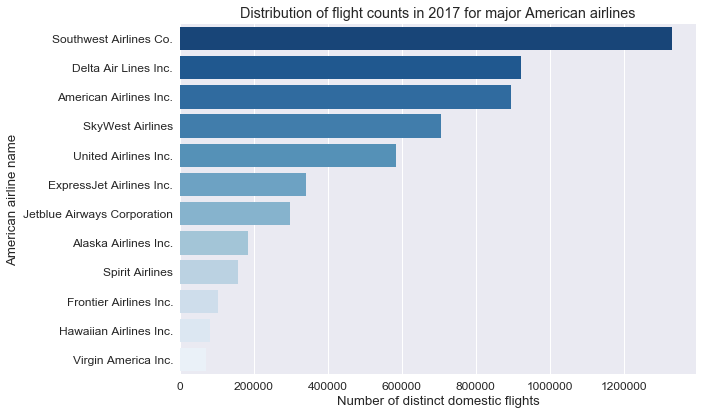

In [205]:
# plot airline graphs
sns.set()
f, ax = sns_reset()
f.set_size_inches(10, 6)

# set fonts
font = {'fontname':'Arial'}

sns.barplot(y = flights_airlines.airline_name, \
            x = flights_airlines.num_flights, \
           palette = 'Blues_r')
plt.title('Distribution of flight counts in 2017 for major American airlines', **font)
plt.xlabel('Number of distinct domestic flights', **font)
plt.ylabel('American airline name', **font)

plt.savefig('./visualizations/airline-flight-distribution.png', dpi = 600)
plt.show()

##### Graphs of flights - paths

In [8]:
# flights by airports
flights_airports = FLIGHTS.groupby(['origin_airport', \
                                   'destination_airport']).year.count().reset_index().rename({'year': \
                                                                                'num_flights'}, axis = 1)
flights_airports.sort_values(by = 'num_flights', ascending = False, inplace = True)

# map to origin & destination
flights_airports = flights_airports.merge(AIRPORTS[['airport_id', \
                                                    'latitude', \
                                                    'longitude']], \
                                          left_on = 'origin_airport', \
                                          right_on = 'airport_id')
flights_airports.rename({'latitude': 'o_lat', 'longitude': 'o_long'}, axis = 1, inplace = True)
flights_airports.drop(['airport_id'], axis = 1, inplace = True)
flights_airports = flights_airports.merge(AIRPORTS[['airport_id', \
                                                    'latitude', \
                                                    'longitude']], \
                                          left_on = 'destination_airport', \
                                          right_on = 'airport_id')
flights_airports.rename({'latitude': 'd_lat', 'longitude': 'd_long'}, axis = 1, inplace = True)
flights_airports.drop(['airport_id'], axis = 1, inplace = True)
flights_airports.head(10)

,origin_airport,destination_airport,num_flights,o_lat,o_long,d_lat,d_long
0,SFO,LAX,15786,37.61900,-122.37484,33.94254,-118.40807
1,JFK,LAX,12758,40.63975,-73.77893,33.94254,-118.40807
2,LAS,LAX,11028,36.08036,-115.15233,33.94254,-118.40807
3,ORD,LAX,8602,41.97960,-87.90446,33.94254,-118.40807
4,SEA,LAX,10125,47.44898,-122.30931,33.94254,-118.40807
5,HNL,LAX,5699,21.31869,-157.92241,33.94254,-118.40807
6,OGG,LAX,3317,20.89865,-156.43046,33.94254,-118.40807
7,ATL,LAX,6564,33.64044,-84.42694,33.94254,-118.40807
8,MCO,LAX,3345,28.42889,-81.31603,33.94254,-118.40807
9,DEN,LAX,8633,39.85841,-104.66700,33.94254,-118.40807


In [196]:
# output for kepler
flights_airports_top = flights_airports.sort_values(by = 'num_flights', ascending = False).reset_index(drop = True)
flights_airports_top[0:2000].to_csv('KEPLER-airports-output-2000.csv', index = False)

In [22]:
# origin airports
flights_origin = FLIGHTS.groupby(['origin_airport']).year.count().reset_index().rename({'year': \
                                                                                'num_flights'}, axis = 1)

# map to origin
flights_origin = flights_origin.merge(AIRPORTS[['airport_id', \
                                                    'latitude', \
                                                    'longitude']], \
                                          left_on = 'origin_airport', \
                                          right_on = 'airport_id')
flights_origin.rename({'latitude': 'o_lat', 'longitude': 'o_long'}, axis = 1, inplace = True)
flights_origin.drop(['origin_airport'], axis = 1, inplace = True)
flights_origin.dropna(inplace = True)
flights_origin.sort_values(by = 'num_flights', ascending = False, inplace = True)

# output for kepler
flights_origin.to_csv('KEPLER-origins.csv', index = False)

In [24]:
# destination airports
flights_dest = FLIGHTS.groupby(['destination_airport']).year.count().reset_index().rename({'year': \
                                                                                'num_flights'}, axis = 1)

# map to dest
flights_dest = flights_dest.merge(AIRPORTS[['airport_id', \
                                                    'latitude', \
                                                    'longitude']], \
                                          left_on = 'destination_airport', \
                                          right_on = 'airport_id')
flights_dest.rename({'latitude': 'o_lat', 'longitude': 'o_long'}, axis = 1, inplace = True)
flights_dest.drop(['destination_airport'], axis = 1, inplace = True)
flights_dest.dropna(inplace = True)
flights_dest.sort_values(by = 'num_flights', ascending = False, inplace = True)

# output for kepler
flights_dest.to_csv('KEPLER-dest.csv', index = False)

##### Percent changes in air travel

In [198]:
PCT_CHANGE = pd.read_csv('./analysis-data/percent_change.csv')
PCT_CHANGE

,city,percent_diff
0,Missoula/MT,57.424522
1,Rochester/NY,18.786982
2,Seattle/WA,16.882703
3,Spokane/WA,16.743738
4,Chicago/IL,12.989763
5,Portland/OR,12.186715
6,San Diego/CA,11.649613
7,San Francisco/CA,11.427168
8,Grand Rapids/MI,10.575645
9,Aspen/CO,9.412888


<Figure size 432x288 with 0 Axes>

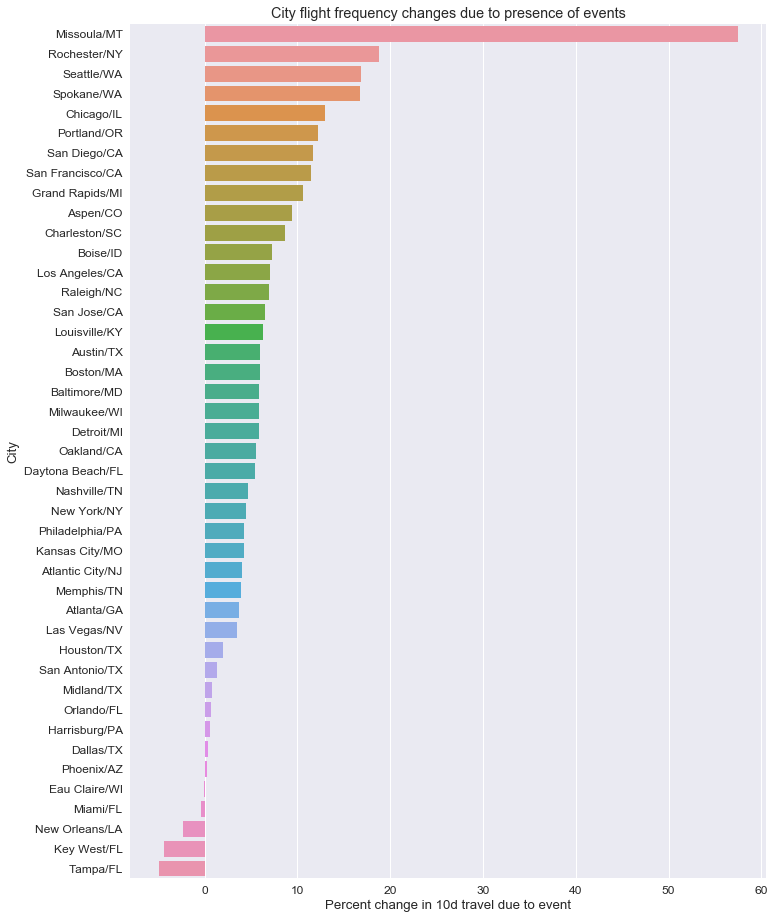

In [270]:
# plot airline graphs
sns.set()
f, ax = sns_reset()
f.set_size_inches(11, 13)

# set fonts
font = {'fontname':'Arial'}

sns.barplot(x = PCT_CHANGE.percent_diff, y = PCT_CHANGE.city)
plt.title('City flight frequency changes due to presence of events', **font)
plt.xlabel('Percent change in 10d travel due to event', **font)
plt.ylabel('City', **font)

plt.savefig('./visualizations/percent-changes.png', dpi = 300)
plt.show()

##### Airfare analysis

In [247]:
fares = pd.read_csv('./analysis-data/fares_full_data.csv')

In [212]:
fares

,destination_airport_name,destination_city,destination_state,origin_airport_name,origin_city,origin_state,quarter,airline_id,origin_airport,destination_airport,...,2460,2470,2480,2490,2500,origin_citystate,destination_citystate,count,mean,sd
0,Lehigh Valley International Airport,Allentown,PA,Albany International Airport,Albany,NY,2,--,ALB,ABE,...,0,0,0,0,0,Albany/NY,Allentown/PA,1,30.000000,0.000000
1,Lehigh Valley International Airport,Allentown,PA,Albany International Airport,Albany,NY,3,--,ALB,ABE,...,0,0,0,0,0,Albany/NY,Allentown/PA,2,20.000000,0.000000
2,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,1,DL,ATL,ABE,...,0,0,0,0,0,Atlanta/GA,Allentown/PA,1298,167.542373,148.456517
3,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,2,DL,ATL,ABE,...,0,0,0,0,2,Atlanta/GA,Allentown/PA,1477,184.969533,177.495790
4,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,2,AA,ATL,ABE,...,0,0,0,0,0,Atlanta/GA,Allentown/PA,1,110.000000,0.000000
5,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,3,DL,ATL,ABE,...,0,0,0,0,0,Atlanta/GA,Allentown/PA,1388,158.609510,136.570849
6,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,3,AA,ATL,ABE,...,0,0,0,0,0,Atlanta/GA,Allentown/PA,8,102.500000,64.759169
7,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,4,DL,ATL,ABE,...,0,0,0,0,2,Atlanta/GA,Allentown/PA,1585,166.006309,150.808170
8,Lehigh Valley International Airport,Allentown,PA,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,4,AA,ATL,ABE,...,0,0,0,0,0,Atlanta/GA,Allentown/PA,1,140.000000,0.000000
9,Lehigh Valley International Airport,Allentown,PA,Wilkes-Barre/Scranton International Airport,Wilkes-Barre/Scranton,PA,1,--,AVP,ABE,...,0,0,0,0,0,Wilkes-Barre/Scranton/PA,Allentown/PA,4,27.500000,30.310889


In [217]:
fares = fares[['origin_airport', 'destination_airport', 'quarter', 'airline_id', 'count', 'mean', 'sd']]
valid_airlines = fares[fares.airline_id != '--']
valid_count = fares[fares['count'] > 10] # more than 10 flights

(array([9.045e+03, 8.310e+03, 6.961e+03, 5.794e+03, 3.241e+03, 2.646e+03,
        1.903e+03, 1.675e+03, 1.083e+03, 4.050e+02, 1.420e+02, 8.200e+01,
        7.200e+01, 4.800e+01, 2.100e+01, 1.600e+01, 7.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00]),
 array([  10. ,   82.1,  154.2,  226.3,  298.4,  370.5,  442.6,  514.7,
         586.8,  658.9,  731. ,  803.1,  875.2,  947.3, 1019.4, 1091.5,
        1163.6, 1235.7, 1307.8, 1379.9, 1452. ]),
 <a list of 20 Patch objects>)

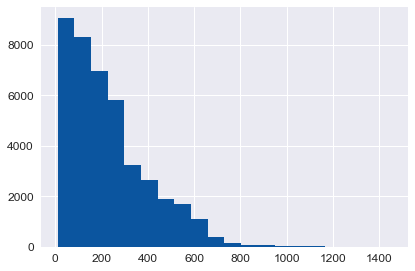

In [228]:
# graph of means over all flights
plt.hist(valid_count['mean'], bins = 20)

<Figure size 432x288 with 0 Axes>

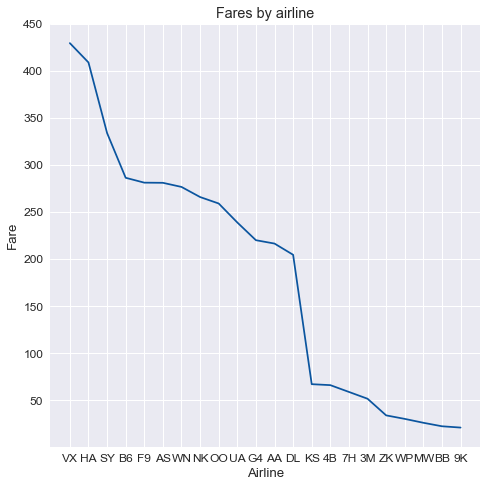

In [269]:
airline_means = valid_airlines[valid_airlines['count'] > 10] # more than 10 flights
airline_means = airline_means.groupby('airline_id')[['mean']].mean()
airline_means.sort_values(by = 'mean', ascending = False, inplace = True)

# plot airline graphs
sns.set()
f, ax = sns_reset()
f.set_size_inches(7, 7)

# set fonts
font = {'fontname':'Arial'}

plt.plot(airline_means['mean'])
plt.title('Fares by airline', **font)
plt.xlabel('Airline', **font)
plt.ylabel('Fare', **font)

plt.savefig('./visualizations/fare-by-airline.png', dpi = 300)
plt.show()

In [267]:
airline_means = airline_means.merge(AIRLINES, left_index = True, right_on = 'airline_id')
airline_means[['airline_id', 'airline_name']].reset_index(drop = True)

,airline_id,airline_name
0,VX,Virgin America Inc.
1,HA,Hawaiian Airlines Inc.
2,SY,MN Airlines LLC
3,B6,Jetblue Airways Corporation
4,F9,Frontier Airlines Inc.
5,AS,Alaska Airlines Inc.
6,WN,Southwest Airlines Co.
7,NK,Spirit Airlines
8,OO,SkyWest Airlines
9,UA,United Airlines Inc.
